<h3>K-Means in Practice</p>

In [1]:
# Load important packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from geopandas import GeoDataFrame, points_from_xy
import folium
sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'

Read the data set

In [2]:
df = pd.read_csv('sources/sports/data4.csv', encoding='ISO-8859-1')

In [3]:
df.shape

(224, 10)

In [4]:
df.head()

Name      District                     Type  \
0    Tai Tau Leng Sitting-out Area         NORTH  Parks, Zoos and Gardens   
1  Choi Hung Road Badminton Centre  WONG TAI SIN         Badminton Courts   
2  Bowen Road Temporary Playground      WAN CHAI         Badminton Courts   
3  Tung Fong Children's Playground         NORTH       Recreation Grounds   
4    Pak Fuk Children's Playground         NORTH       Recreation Grounds   

    Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
0  22.500287  114.123291                 1                  0   
1  22.337532  114.196997                 1                  0   
2  22.271413  114.174842                 1                  0   
3  22.508607  114.100766                 1                  0   
4  22.494622  114.133674                 1                  0   

   VOLLEYBALL COURTS  SWIMMING POOLS  TABLE TENNIS TABLES  
0                  0               0                    0  
1                  0               0                    0  
2                  0               0                    0  
3                  0               0                    0  
4                  0               0                    0

In [5]:
# null values
df.isnull().sum()

Name                   0
District               0
Type                   0
Latitude               0
Longitude              0
BADMINTON COURTS       0
BASKETBALL COURTS      0
VOLLEYBALL COURTS      0
SWIMMING POOLS         0
TABLE TENNIS TABLES    0
dtype: int64

In [6]:
df.dtypes

Name                    object
District                object
Type                    object
Latitude               float64
Longitude              float64
BADMINTON COURTS         int64
BASKETBALL COURTS        int64
VOLLEYBALL COURTS        int64
SWIMMING POOLS           int64
TABLE TENNIS TABLES      int64
dtype: object

In [7]:
df['BADMINTON COURTS'].sum(), df['BASKETBALL COURTS'].sum(), df['SWIMMING POOLS'].sum(), df['TABLE TENNIS TABLES'].sum()

(118, 114, 44, 96)

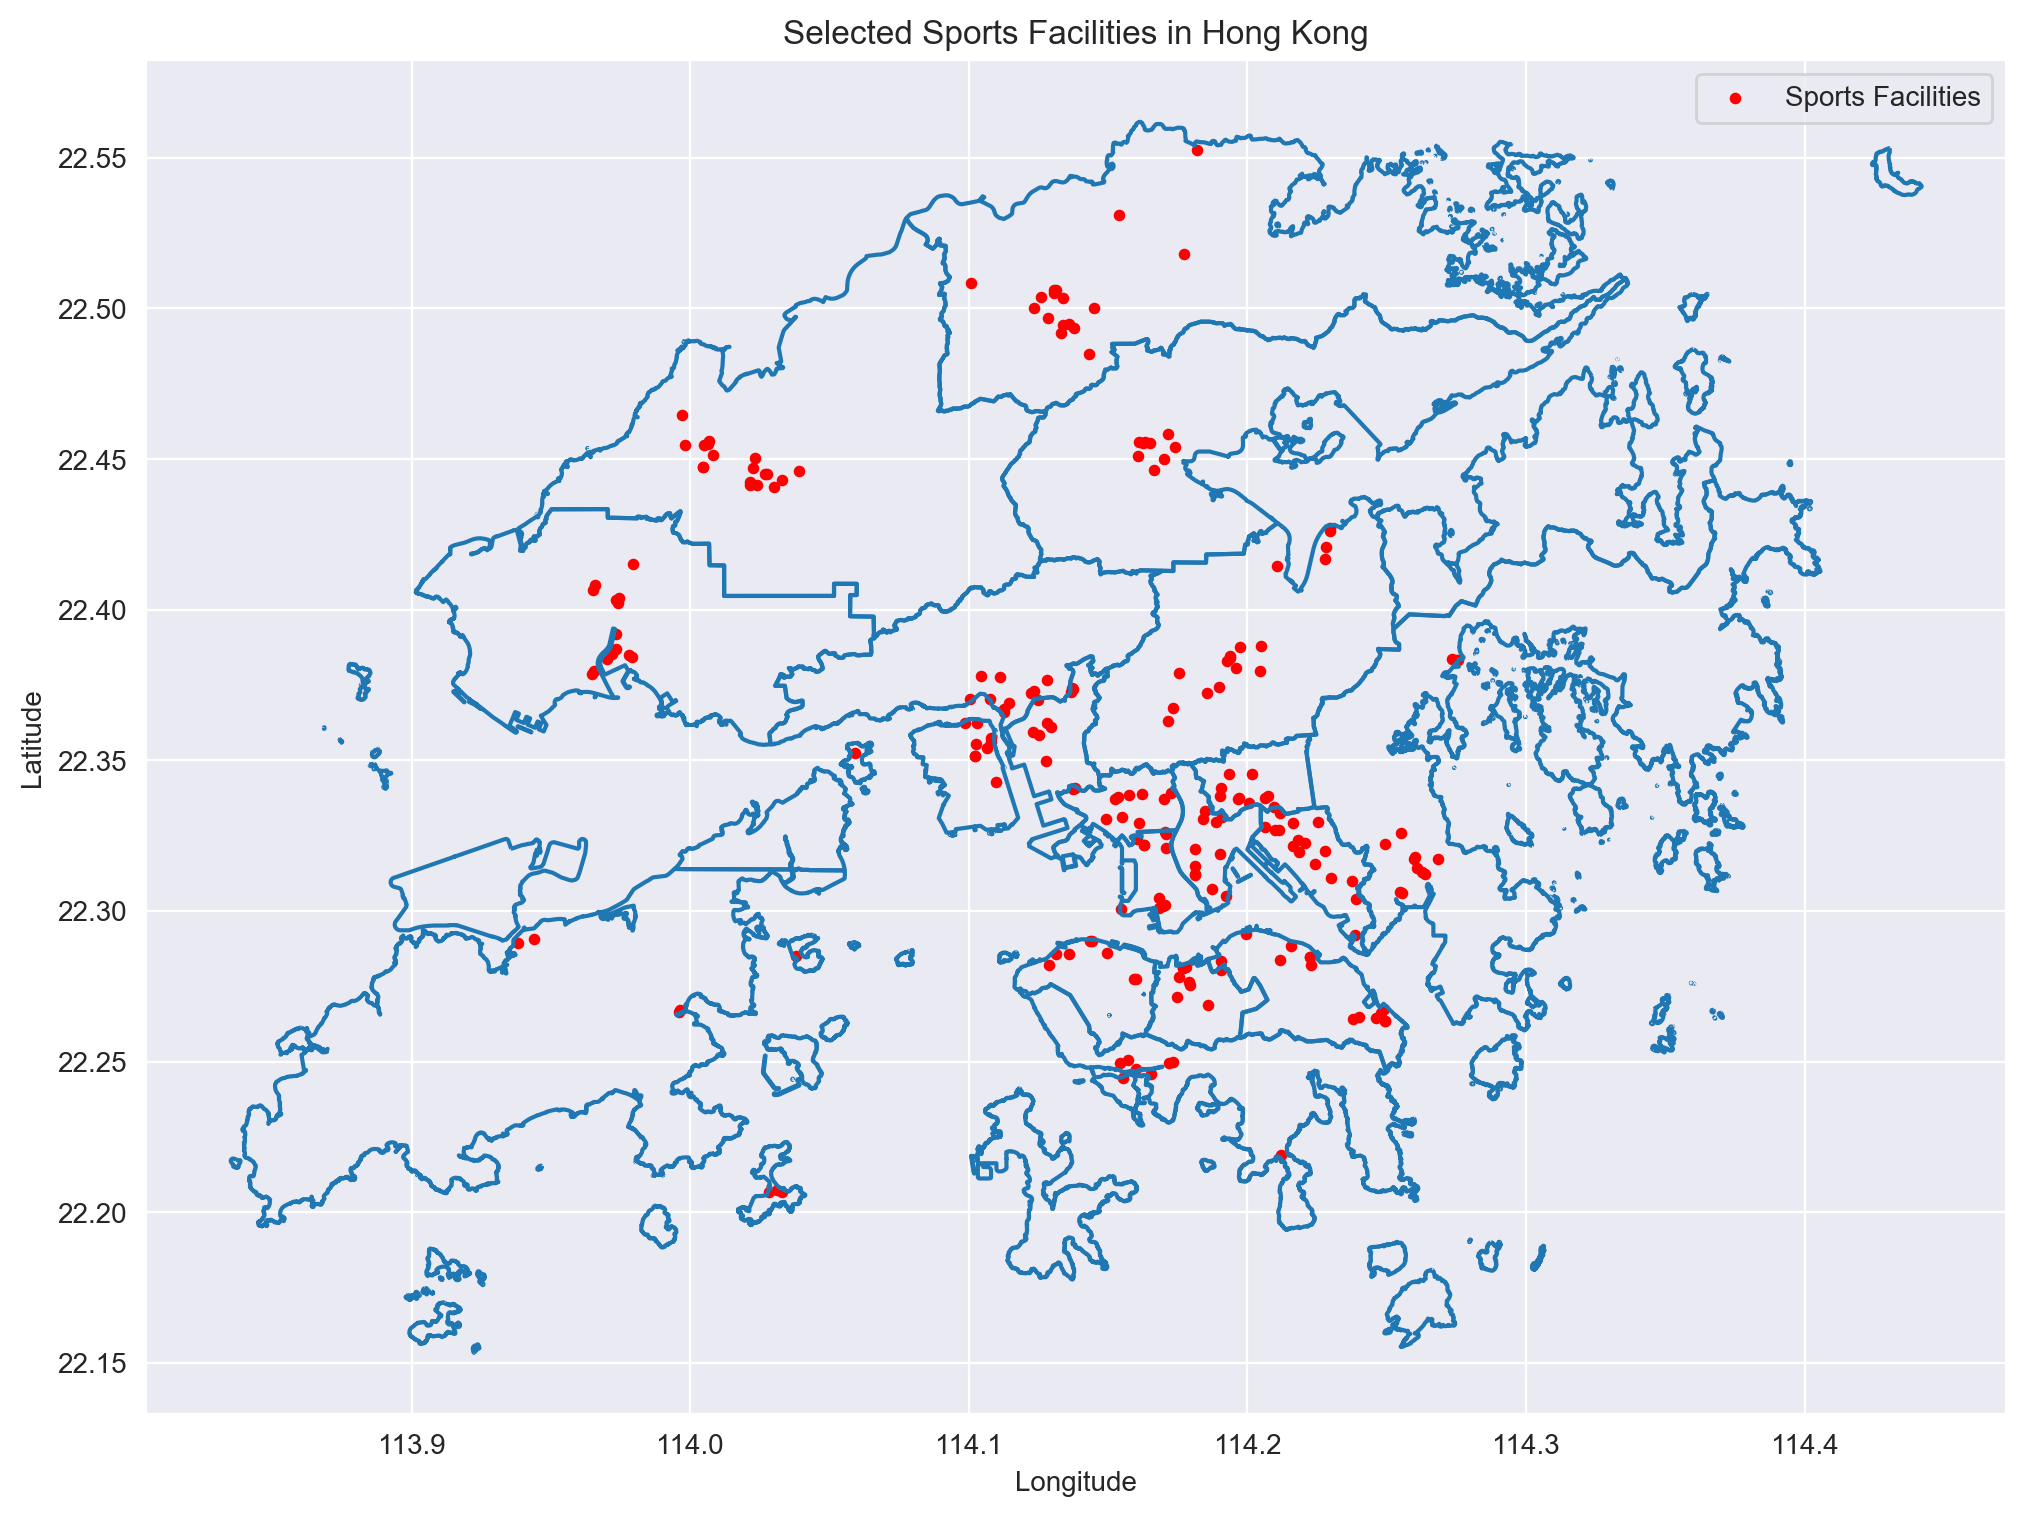

In [8]:
# Load the Hong Kong map data
hong_kong = GeoDataFrame.from_file('sources/Hong_Kong_18_Districts.geojson')

# adjust the map geometry to longitude and latitude format
hong_kong = hong_kong.to_crs(epsg=4326)

# Plot the map with the data points
fig, ax = plt.subplots(figsize=(12, 12))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], s=10, c='r', label='Sports Facilities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Selected Sports Facilities in Hong Kong')
plt.legend()
plt.show()

In [9]:
# Interactive map with the data points
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=5,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
m

In [10]:
# drop rows with SWIMMING POOLS column value = 1 but the rest are 0
df = df.drop(df[(df['SWIMMING POOLS'] == 1) & (df['BADMINTON COURTS'] == 0) & (df['BASKETBALL COURTS'] == 0) & (df['TABLE TENNIS TABLES'] == 0)].index)
df = df.drop('SWIMMING POOLS', axis=1)
df.shape


(180, 9)

In [11]:
df.head()

Name      District                     Type  \
0    Tai Tau Leng Sitting-out Area         NORTH  Parks, Zoos and Gardens   
1  Choi Hung Road Badminton Centre  WONG TAI SIN         Badminton Courts   
2  Bowen Road Temporary Playground      WAN CHAI         Badminton Courts   
3  Tung Fong Children's Playground         NORTH       Recreation Grounds   
4    Pak Fuk Children's Playground         NORTH       Recreation Grounds   

    Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
0  22.500287  114.123291                 1                  0   
1  22.337532  114.196997                 1                  0   
2  22.271413  114.174842                 1                  0   
3  22.508607  114.100766                 1                  0   
4  22.494622  114.133674                 1                  0   

   VOLLEYBALL COURTS  TABLE TENNIS TABLES  
0                  0                    0  
1                  0                    0  
2                  0                    0  
3                  0                    0  
4                  0                    0

In [12]:
# Features are Latitude and	Longitude
X = df[['Latitude', 'Longitude']]
X.head()

Latitude   Longitude
0  22.500287  114.123291
1  22.337532  114.196997
2  22.271413  114.174842
3  22.508607  114.100766
4  22.494622  114.133674

In [13]:
hong_kong.head()

OBJECTID  ID CNAME CNAME_S         ENAME  \
0         1   1  黃大仙區    黄大仙区  WONG TAI SIN   
1         2   6  九龍城區    九龙城区  KOWLOON CITY   
2         3   7   觀塘區     观塘区     KWUN TONG   
3         4   8   西貢區     西贡区      SAI KUNG   
4         5  11    北區      北区         NORTH   

                                            geometry  
0  POLYGON ((114.17942 22.34905, 114.17946 22.349...  
1  MULTIPOLYGON (((114.17700 22.34904, 114.17702 ...  
2  POLYGON ((114.24371 22.28620, 114.24370 22.286...  
3  MULTIPOLYGON (((114.22112 22.35318, 114.22114 ...  
4  MULTIPOLYGON (((114.33576 22.51003, 114.33576 ...

In [14]:
centroids_df = pd.read_csv('sources/centroids_by_population_VR.csv')

In [15]:
centroids_df

Latitude   Longitude           Island
0    22.279557  114.229683        Hong Kong
1    22.246311  114.156634        Hong Kong
2    22.278894  114.190935        Hong Kong
3    22.282172  114.153826        Hong Kong
4    22.219180  114.212205        Hong Kong
..         ...         ...              ...
105  22.467411  113.999545  New Territories
106  22.355211  114.245936  New Territories
107  22.452196  114.160483  New Territories
108  22.374926  114.103147  New Territories
109  22.348962  114.107009  New Territories

[110 rows x 3 columns]

In [16]:
# interactive map with the centroids
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(centroids_df)):
    folium.CircleMarker(
        location=[centroids_df.iloc[i]['Latitude'], centroids_df.iloc[i]['Longitude']],
        radius=5,
        color = 'red',
        fill=True,
        fill_color='red',
    ).add_to(m)
m

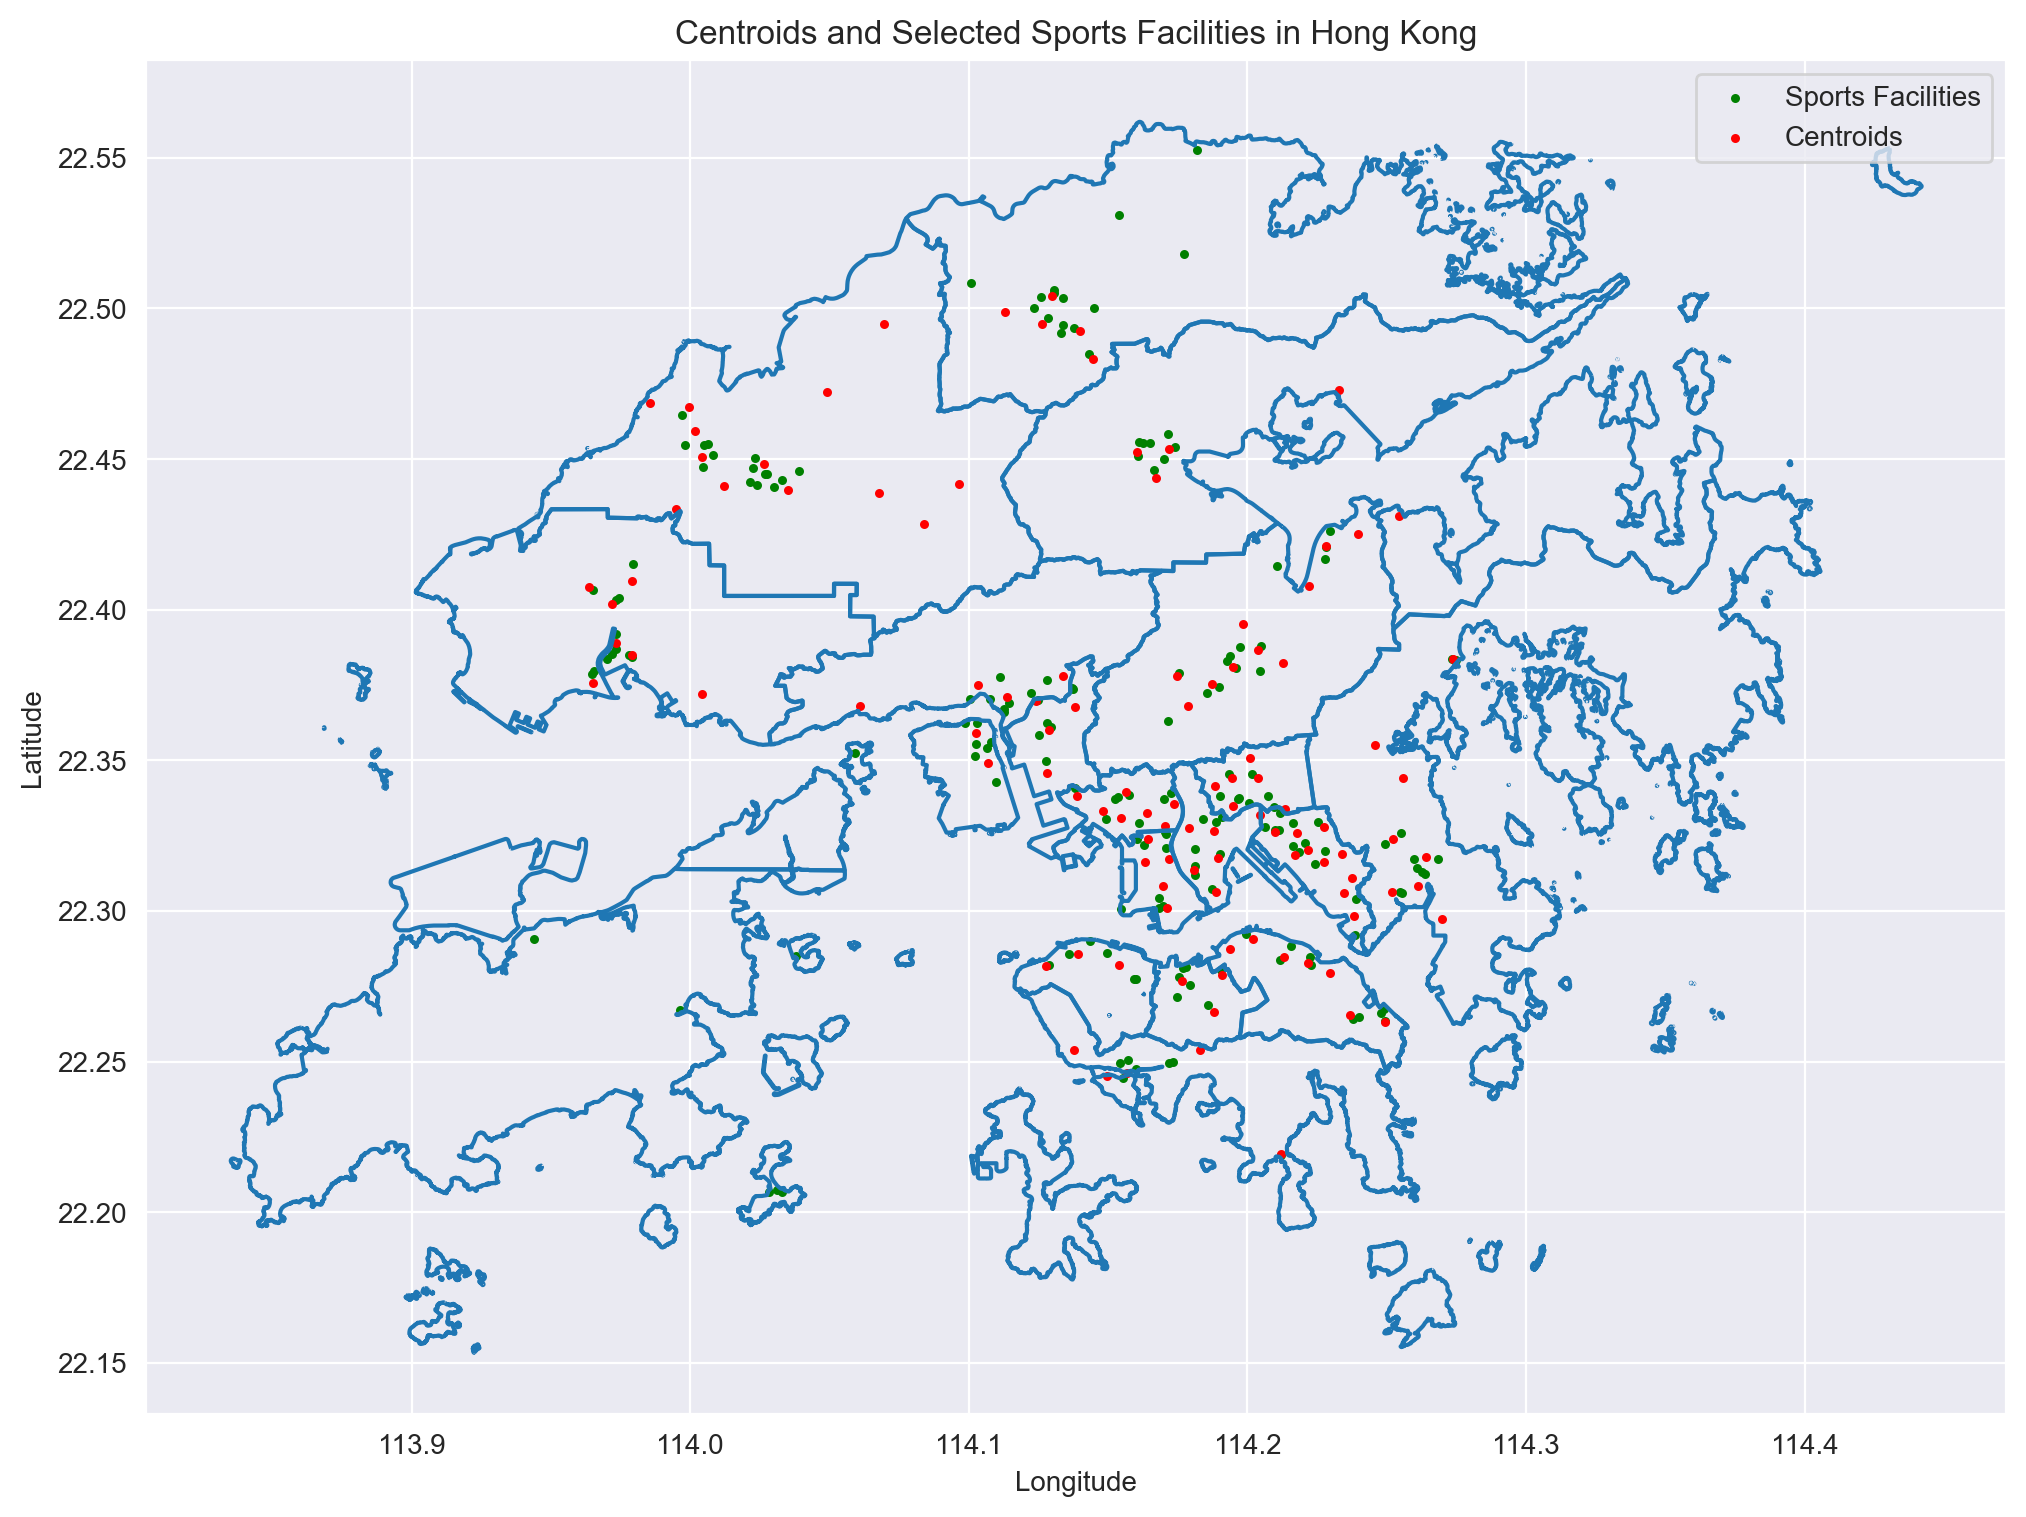

In [17]:
# plot the centroids and the data points
fig, ax = plt.subplots(figsize=(12, 12))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], s=5, c='g', label='Sports Facilities')
plt.scatter(centroids_df['Longitude'], centroids_df['Latitude'], s=5, c='r', label='Centroids')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Centroids and Selected Sports Facilities in Hong Kong')
plt.legend()
plt.show()

In [18]:
# interactive map with the centroids and the sports facilities
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(centroids_df)):
    folium.CircleMarker(
        location=[centroids_df.iloc[i]['Latitude'], centroids_df.iloc[i]['Longitude']],
        radius=5,
        color = 'red',
        fill=True,
        fill_color='red',
    ).add_to(m)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=5,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
m 

In [19]:
# find the data point with the shortest distance between each centroids
from sklearn.metrics import pairwise_distances_argmin_min

closest, _ = pairwise_distances_argmin_min(centroids_df[['Latitude', 'Longitude']], X)
closest

array([ 70,  74, 169,  51,  92,  36, 108,  84,  52, 104,  79,  94,  70,
        68,  74,  53,  94, 114,  91, 135, 113, 111, 144,  95,  73,   9,
        93, 121, 176, 107,  91,  42, 109, 130, 101, 138, 147,  83,  90,
        42, 137, 135, 122,  45, 112, 158,  91, 118, 132,  93,  22,  23,
        48,  26, 116, 125,  66,  64,   7, 126,  29,  43,  99,  10, 143,
        14, 106,  47,  29, 160, 128, 154,  88,  32, 126, 140, 152,  62,
         3,  11, 119,  66,  29, 115, 151,  55,  87, 110,  63,  89,  65,
       150,  29,  86,  38,  98,   0, 168, 152, 117, 126,  58,  48, 153,
       148,  63,  99, 105, 124, 100], dtype=int64)

In [20]:
# display the data points with the closest centroids
df_closest = df.iloc[closest]
df_closest

Name             District            Type  \
70       Sai Wan Ho Sports Centre              EASTERN  Sports Centres   
74      Ap Lei Chau Sports Centre             SOUTHERN  Sports Centres   
169    Causeway Bay Sports Ground             WAN CHAI  Sports Grounds   
51       Sheung Wan Sports Centre  CENTRAL AND WESTERN  Sports Centres   
92          Stanley Sports Centre             SOUTHERN  Sports Centres   
..                            ...                  ...             ...   
63     Tin Fai Road Sports Centre            YUEN LONG  Sports Centres   
99           Po Lam Sports Centre             SAI KUNG  Sports Centres   
105          Tai Wo Sports Centre               TAI PO  Sports Centres   
124  Tsuen Wan West Sports Centre            TSUEN WAN  Sports Centres   
100        Tsing Yi Sports Centre           KWAI TSING  Sports Centres   

      Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
70   22.282052  114.222723                 1                  1   
74   22.244481  114.155416                 1                  1   
169  22.280490  114.190600                 0                  0   
51   22.286003  114.149626                 1                  1   
92   22.219156  114.212208                 1                  1   
..         ...         ...               ...                ...   
63   22.464796  113.997022                 1                  1   
99   22.325856  114.255108                 1                  1   
105  22.451001  114.160582                 1                  1   
124  22.370477  114.100509                 1                  1   
100  22.354098  114.106460                 1                  1   

     VOLLEYBALL COURTS  TABLE TENNIS TABLES  
70                   0                    1  
74                   1                    1  
169                  0                    0  
51                   1                    1  
92                   1                    1  
..                 ...                  ...  
63                   1                    1  
99                   1                    1  
105                  1                    1  
124                  1                    1  
100                  1                    1  

[110 rows x 9 columns]

In [21]:
# Convert the distance to meters
from geopy.distance import geodesic

distances = []
for i in range(len(centroids_df)):
    distances.append(geodesic((centroids_df['Latitude'].iloc[i], centroids_df['Longitude'].iloc[i]), (df_closest['Latitude'].iloc[i], df_closest['Longitude'].iloc[i])).meters)
df_closest['Distance (m)'] = distances
df_closest

C:\Users\visha\AppData\Local\Temp\ipykernel_17480\2227334755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closest['Distance (m)'] = distances


Name             District            Type  \
70       Sai Wan Ho Sports Centre              EASTERN  Sports Centres   
74      Ap Lei Chau Sports Centre             SOUTHERN  Sports Centres   
169    Causeway Bay Sports Ground             WAN CHAI  Sports Grounds   
51       Sheung Wan Sports Centre  CENTRAL AND WESTERN  Sports Centres   
92          Stanley Sports Centre             SOUTHERN  Sports Centres   
..                            ...                  ...             ...   
63     Tin Fai Road Sports Centre            YUEN LONG  Sports Centres   
99           Po Lam Sports Centre             SAI KUNG  Sports Centres   
105          Tai Wo Sports Centre               TAI PO  Sports Centres   
124  Tsuen Wan West Sports Centre            TSUEN WAN  Sports Centres   
100        Tsing Yi Sports Centre           KWAI TSING  Sports Centres   

      Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
70   22.282052  114.222723                 1                  1   
74   22.244481  114.155416                 1                  1   
169  22.280490  114.190600                 0                  0   
51   22.286003  114.149626                 1                  1   
92   22.219156  114.212208                 1                  1   
..         ...         ...               ...                ...   
63   22.464796  113.997022                 1                  1   
99   22.325856  114.255108                 1                  1   
105  22.451001  114.160582                 1                  1   
124  22.370477  114.100509                 1                  1   
100  22.354098  114.106460                 1                  1   

     VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
70                   0                    1    768.654384  
74                   1                    1    238.399329  
169                  0                    0    180.048481  
51                   1                    1    605.974606  
92                   1                    1      2.686978  
..                 ...                  ...           ...  
63                   1                    1    388.985418  
99                   1                    1   3385.144371  
105                  1                    1    132.700873  
124                  1                    1    562.621170  
100                  1                    1    571.602413  

[110 rows x 10 columns]

In [22]:
df_closest.describe()

Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
count  110.000000  110.000000        110.000000         110.000000   
mean    22.358266  114.153931          0.790909           0.754545   
std      0.066678    0.081209          0.408521           0.432326   
min     22.219156  113.964700          0.000000           0.000000   
25%     22.315039  114.127855          1.000000           1.000000   
50%     22.339942  114.173056          1.000000           1.000000   
75%     22.405745  114.211826          1.000000           1.000000   
max     22.508607  114.273300          1.000000           1.000000   

       VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
count         110.000000           110.000000    110.000000  
mean            0.718182             0.718182    743.243234  
std             0.451944             0.451944   1062.839128  
min             0.000000             0.000000      2.686978  
25%             0.000000             0.000000    219.801486  
50%             1.000000             1.000000    374.930363  
75%             1.000000             1.000000    637.981878  
max             1.000000             1.000000   5933.516729

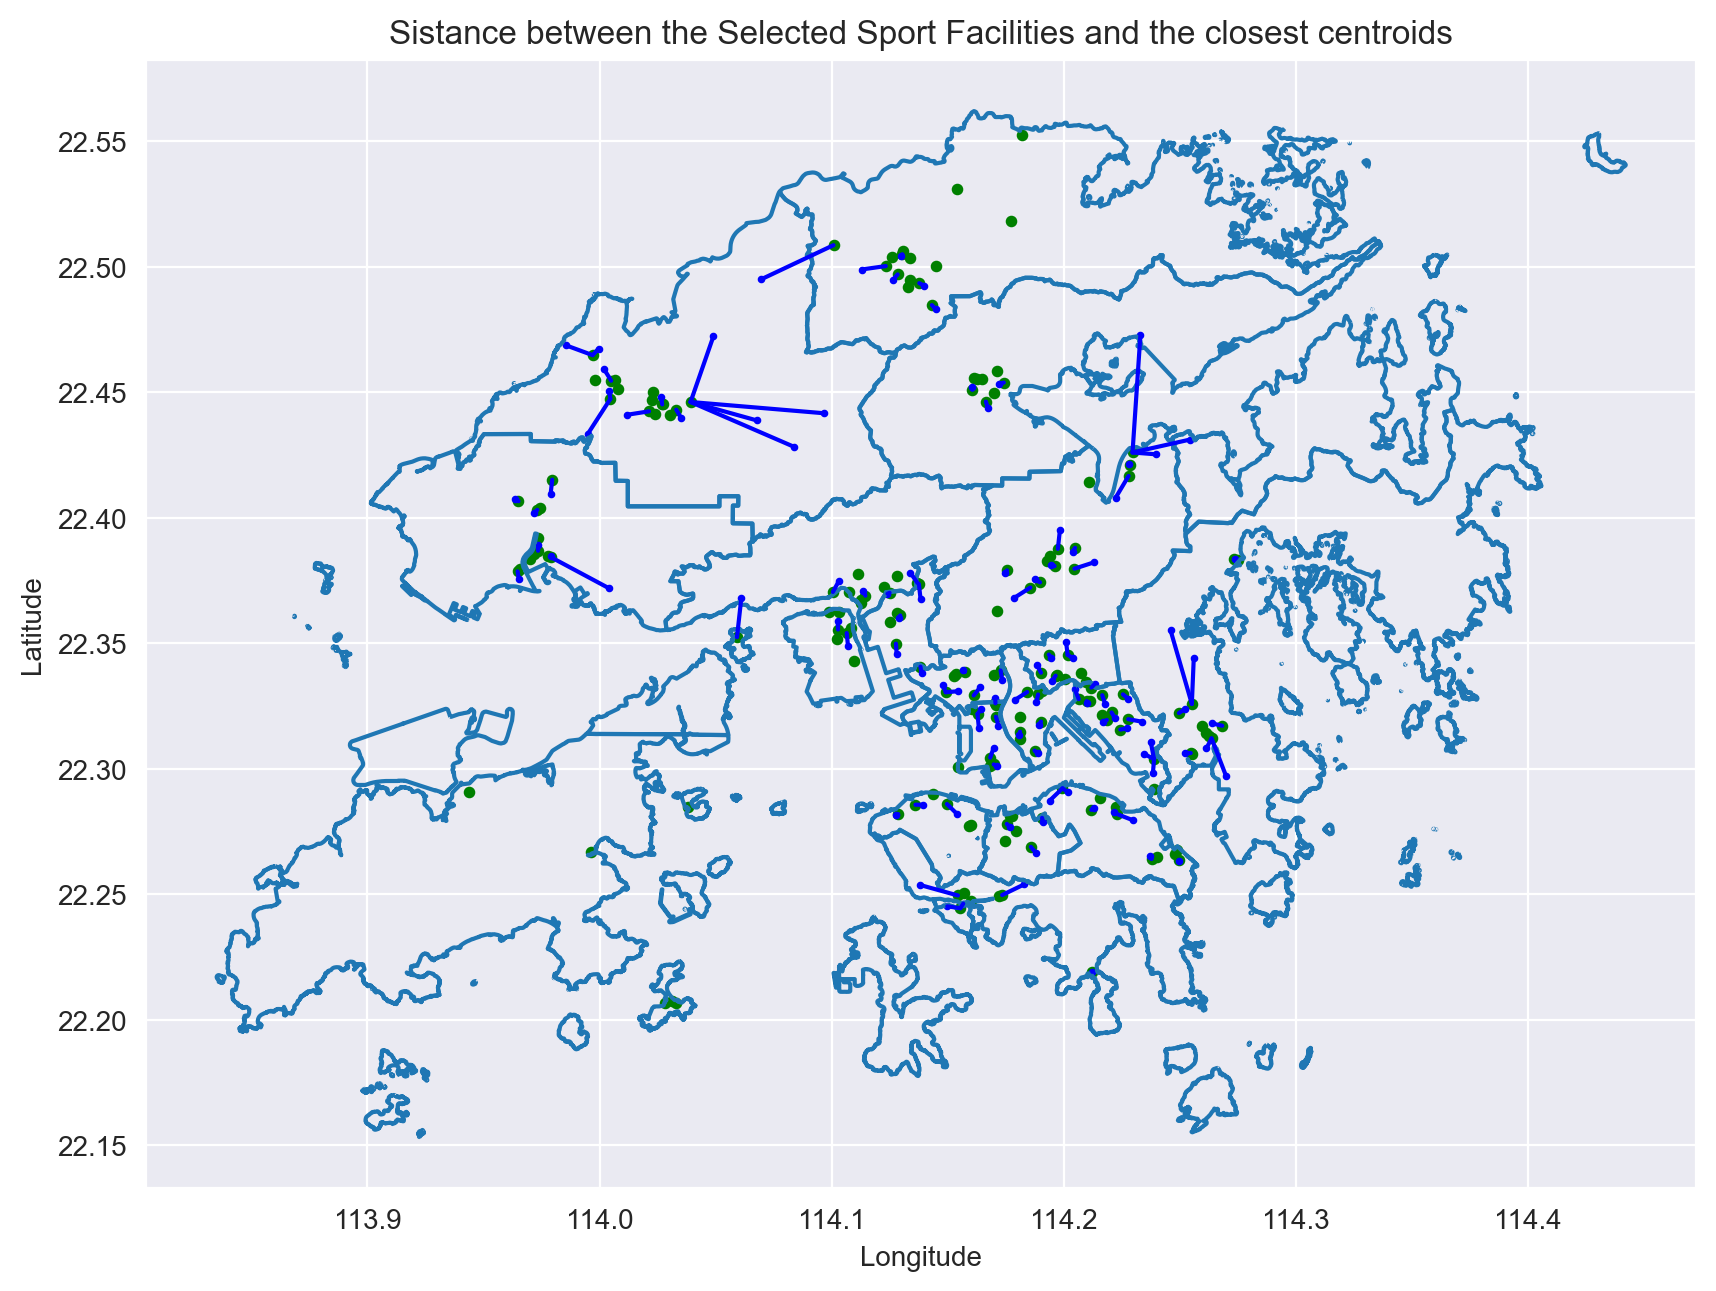

In [65]:
# plot the data points closest to centroids on the map with the centroids and draw a line between them
fig, ax = plt.subplots(figsize=(10,10))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], c='g', s=10, label='Sports Facilities')
plt.scatter(centroids_df['Longitude'], centroids_df['Latitude'], c='b', s=3, label='Centroids')
for i in range(len(df_closest)):
    plt.plot([df_closest['Longitude'].iloc[i], centroids_df['Longitude'].iloc[i]], [df_closest['Latitude'].iloc[i], centroids_df['Latitude'].iloc[i]], 'b-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Sistance between the Selected Sport Facilities and the closest centroids')
plt.show()

In [24]:
# Interactive map of the data points closest to centroids on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=5,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df)):
    folium.Marker(
        location=[centroids_df['Latitude'].iloc[i], centroids_df['Longitude'].iloc[i]],
        popup='Centroid ' + str(i+1),
        icon=folium.Icon(color='red')
    ).add_to(m)
for i in range(len(df_closest)):
    folium.PolyLine([[df_closest['Latitude'].iloc[i], df_closest['Longitude'].iloc[i]], [centroids_df['Latitude'].iloc[i], centroids_df['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m

In [25]:
# export df_closest to csv
df_closest.to_csv('sources/closest_sports_facilities_to_centroids.csv', index=False)

## Suggestion by Island

In [26]:
# centroids in Hong Kong Island
centroids_df_Hong_Kong = centroids_df[centroids_df['Island'].str.contains('Hong Kong')]
centroids_df_Hong_Kong.drop('Island', axis=1, inplace=True)
centroids_df_Hong_Kong.shape


C:\Users\visha\AppData\Local\Temp\ipykernel_17480\2640228661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centroids_df_Hong_Kong.drop('Island', axis=1, inplace=True)


(18, 2)

In [27]:
# centroids in Kowloon
centroids_df_Kowloon = centroids_df[centroids_df['Island'].str.contains('Kowloon')]
centroids_df_Kowloon.drop('Island', axis=1, inplace=True)
centroids_df_Kowloon.shape


C:\Users\visha\AppData\Local\Temp\ipykernel_17480\3440744860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centroids_df_Kowloon.drop('Island', axis=1, inplace=True)


(34, 2)

In [28]:
# centroids in New Territories
centroids_df_New_Territories = centroids_df[centroids_df['Island'].str.contains('New Territories')]
centroids_df_New_Territories.drop('Island', axis=1, inplace=True)
centroids_df_New_Territories.shape


C:\Users\visha\AppData\Local\Temp\ipykernel_17480\3251617417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centroids_df_New_Territories.drop('Island', axis=1, inplace=True)


(58, 2)

### Hong Kong

In [29]:
# find the data point with the shortest distance between each centroids in Hong Kong Island
closest_Hong_Kong, _ = pairwise_distances_argmin_min(centroids_df_Hong_Kong[['Latitude', 'Longitude']], X)
closest_Hong_Kong

array([ 70,  74, 169,  51,  92,  36, 108,  84,  52, 104,  79,  94,  70,
        68,  74,  53,  94, 114], dtype=int64)

In [30]:
# display the data points with the closest centroids in Hong Kong Island
df_closest_Hong_Kong = df.iloc[closest_Hong_Kong]
df_closest_Hong_Kong


Name             District  \
70                    Sai Wan Ho Sports Centre              EASTERN   
74                   Ap Lei Chau Sports Centre             SOUTHERN   
169                 Causeway Bay Sports Ground             WAN CHAI   
51                    Sheung Wan Sports Centre  CENTRAL AND WESTERN   
92                       Stanley Sports Centre             SOUTHERN   
36   Yee Shing Lane Temporary Sitting Out Area              EASTERN   
108                   Quarry Bay Sports Centre              EASTERN   
84                      Aberdeen Sports Centre             SOUTHERN   
52                Shek Tong Tsui Sports Centre  CENTRAL AND WESTERN   
104                Lockhart Road Sports Centre             WAN CHAI   
79                Wong Chuk Hang Sports Centre             SOUTHERN   
94                     Java Road Sports Centre              EASTERN   
70                    Sai Wan Ho Sports Centre              EASTERN   
68                   Siu Sai Wan Sports Centre              EASTERN   
74                   Ap Lei Chau Sports Centre             SOUTHERN   
53                    Smithfield Sports Centre  CENTRAL AND WESTERN   
94                     Java Road Sports Centre              EASTERN   
114               Wong Nai Chung Sports Centre             WAN CHAI   

                                     Type   Latitude   Longitude  \
70                         Sports Centres  22.282052  114.222723   
74                         Sports Centres  22.244481  114.155416   
169                        Sports Grounds  22.280490  114.190600   
51                         Sports Centres  22.286003  114.149626   
92                         Sports Centres  22.219156  114.212208   
36   Other Recreation & Sports Facilities  22.264100  114.237800   
108                        Sports Centres  22.283689  114.211788   
84                         Sports Centres  22.249565  114.154358   
52                         Sports Centres  22.285720  114.136051   
104                        Sports Centres  22.278076  114.175419   
79                         Sports Centres  22.249738  114.173392   
94                         Sports Centres  22.292253  114.199398   
70                         Sports Centres  22.282052  114.222723   
68                         Sports Centres  22.263575  114.249553   
74                         Sports Centres  22.244481  114.155416   
53                         Sports Centres  22.281943  114.128639   
94                         Sports Centres  22.292253  114.199398   
114                        Sports Centres  22.268946  114.185752   

     BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
70                  1                  1                  0   
74                  1                  1                  1   
169                 0                  0                  0   
51                  1                  1                  1   
92                  1                  1                  1   
36                  0                  0                  0   
108                 1                  1                  1   
84                  1                  1                  1   
52                  1                  1                  1   
104                 1                  1                  1   
79                  1                  1                  1   
94                  1                  1                  1   
70                  1                  1                  0   
68                  1                  1                  1   
74                  1                  1                  1   
53                  1                  1                  1   
94                  1                  1                  1   
114                 1                  1                  1   

     TABLE TENNIS TABLES  
70                     1  
74                     1  
169                    0  
51                     1  
92                     1  
36                     0  
108         

In [31]:
# Convert the distance to meters
distances_Hong_Kong = []
for i in range(len(centroids_df_Hong_Kong)):
    distances_Hong_Kong.append(geodesic((centroids_df_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]), (df_closest_Hong_Kong['Latitude'].iloc[i], df_closest_Hong_Kong['Longitude'].iloc[i])).meters)
df_closest_Hong_Kong['Distance (m)'] = distances_Hong_Kong
df_closest_Hong_Kong

C:\Users\visha\AppData\Local\Temp\ipykernel_17480\2945700325.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closest_Hong_Kong['Distance (m)'] = distances_Hong_Kong


Name             District  \
70                    Sai Wan Ho Sports Centre              EASTERN   
74                   Ap Lei Chau Sports Centre             SOUTHERN   
169                 Causeway Bay Sports Ground             WAN CHAI   
51                    Sheung Wan Sports Centre  CENTRAL AND WESTERN   
92                       Stanley Sports Centre             SOUTHERN   
36   Yee Shing Lane Temporary Sitting Out Area              EASTERN   
108                   Quarry Bay Sports Centre              EASTERN   
84                      Aberdeen Sports Centre             SOUTHERN   
52                Shek Tong Tsui Sports Centre  CENTRAL AND WESTERN   
104                Lockhart Road Sports Centre             WAN CHAI   
79                Wong Chuk Hang Sports Centre             SOUTHERN   
94                     Java Road Sports Centre              EASTERN   
70                    Sai Wan Ho Sports Centre              EASTERN   
68                   Siu Sai Wan Sports Centre              EASTERN   
74                   Ap Lei Chau Sports Centre             SOUTHERN   
53                    Smithfield Sports Centre  CENTRAL AND WESTERN   
94                     Java Road Sports Centre              EASTERN   
114               Wong Nai Chung Sports Centre             WAN CHAI   

                                     Type   Latitude   Longitude  \
70                         Sports Centres  22.282052  114.222723   
74                         Sports Centres  22.244481  114.155416   
169                        Sports Grounds  22.280490  114.190600   
51                         Sports Centres  22.286003  114.149626   
92                         Sports Centres  22.219156  114.212208   
36   Other Recreation & Sports Facilities  22.264100  114.237800   
108                        Sports Centres  22.283689  114.211788   
84                         Sports Centres  22.249565  114.154358   
52                         Sports Centres  22.285720  114.136051   
104                        Sports Centres  22.278076  114.175419   
79                         Sports Centres  22.249738  114.173392   
94                         Sports Centres  22.292253  114.199398   
70                         Sports Centres  22.282052  114.222723   
68                         Sports Centres  22.263575  114.249553   
74                         Sports Centres  22.244481  114.155416   
53                         Sports Centres  22.281943  114.128639   
94                         Sports Centres  22.292253  114.199398   
114                        Sports Centres  22.268946  114.185752   

     BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
70                  1                  1                  0   
74                  1                  1                  1   
169                 0                  0                  0   
51                  1                  1                  1   
92                  1                  1                  1   
36                  0                  0                  0   
108                 1                  1                  1   
84                  1                  1                  1   
52                  1                  1                  1   
104                 1                  1                  1   
79                  1                  1                  1   
94                  1                  1                  1   
70                  1                  1                  0   
68                  1                  1                  1   
74                  1                  1                  1   
53                  1                  1                  1   
94                  1                  1                  1   
114                 1                  1                  1   

     TABLE TENNIS TABLES  Distance (m)  
70                     1    768.654384  
74                     1    238.399329  
169                    0    180.048481  
51                     1    605.97460

In [32]:
df_closest_Hong_Kong.describe()

Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
count  18.000000   18.000000         18.000000          18.000000   
mean   22.269365  114.186681          0.888889           0.888889   
std     0.020400    0.035475          0.323381           0.323381   
min    22.219156  114.128639          0.000000           0.000000   
25%    22.253197  114.155416          1.000000           1.000000   
50%    22.279283  114.188176          1.000000           1.000000   
75%    22.283280  114.212103          1.000000           1.000000   
max    22.292253  114.249553          1.000000           1.000000   

       VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
count          18.000000            18.000000     18.000000  
mean            0.777778             0.833333    434.671429  
std             0.427793             0.383482    444.165148  
min             0.000000             0.000000      2.686978  
25%             1.000000             1.000000    165.081991  
50%             1.000000             1.000000    275.274448  
75%             1.000000             1.000000    601.550001  
max             1.000000             1.000000   1760.337819

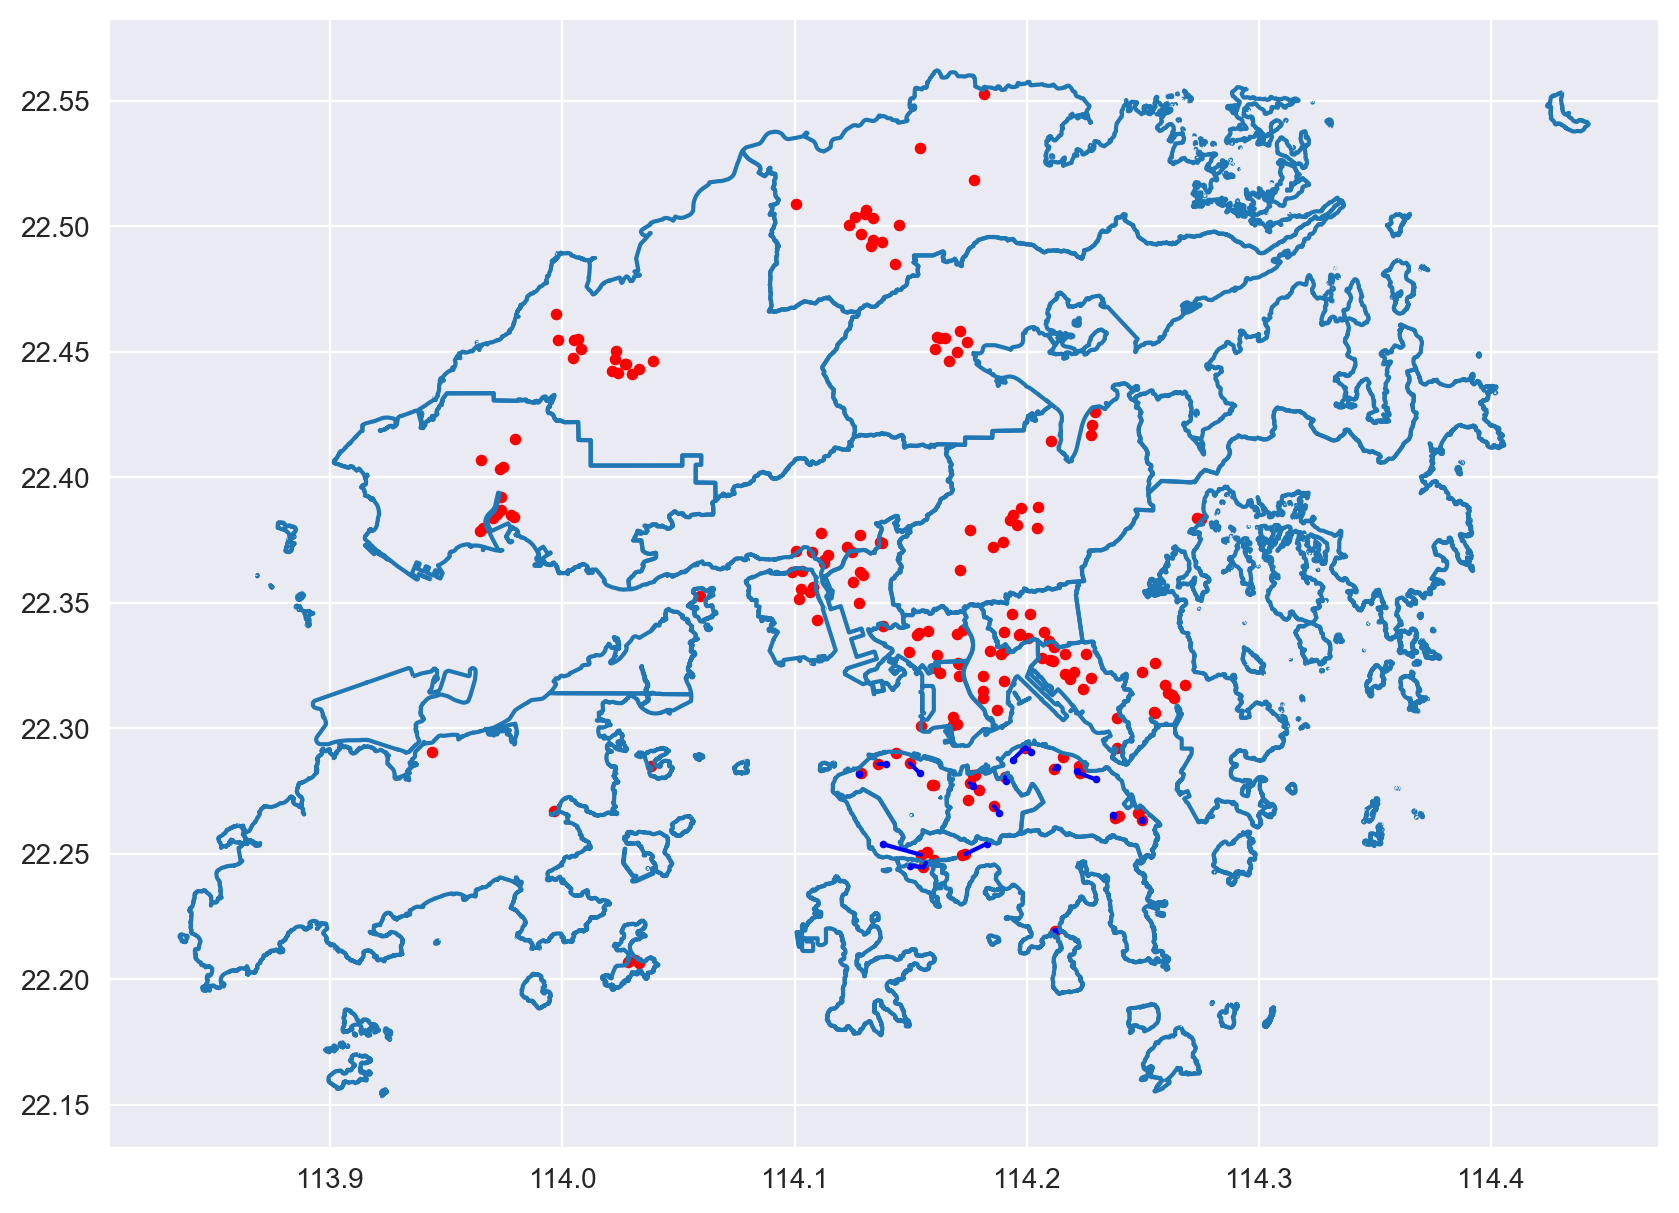

In [33]:
# plot the data points closest to centroids in Hong Kong Island on the map with the centroids and draw a line between them
fig, ax = plt.subplots(figsize=(10,10))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], c='r', s=10, label='Sports Facilities')
plt.scatter(centroids_df_Hong_Kong['Longitude'], centroids_df_Hong_Kong['Latitude'], c='b', s=3, label='Centroids')
for i in range(len(df_closest_Hong_Kong)):
    plt.plot([df_closest_Hong_Kong['Longitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]], [df_closest_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Latitude'].iloc[i]], 'b-')
plt.show()

In [34]:
# Interactive map of the data points closest to centroids in Hong Kong Island on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=5,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_Hong_Kong)):
    folium.Marker(
        location=[centroids_df_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]],
        popup='Centroid ' + str(i+1),
        icon=folium.Icon(color='red')
    ).add_to(m)
for i in range(len(df_closest_Hong_Kong)):
    folium.PolyLine([[df_closest_Hong_Kong['Latitude'].iloc[i], df_closest_Hong_Kong['Longitude'].iloc[i]], [centroids_df_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m

In [35]:
# Interactive map of the data points closest to centroids in Hong Kong Island on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=2,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_Hong_Kong)):
    folium.CircleMarker(
        location=[centroids_df_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]],
        radius=2,
        color = 'red',
        fill=True,
        fill_color='red',
    ).add_to(m)
for i in range(len(df_closest_Hong_Kong)):
    folium.PolyLine([[df_closest_Hong_Kong['Latitude'].iloc[i], df_closest_Hong_Kong['Longitude'].iloc[i]], [centroids_df_Hong_Kong['Latitude'].iloc[i], centroids_df_Hong_Kong['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m

In [36]:
# data points with distance over 500 meters
df_closest_Hong_Kong[df_closest_Hong_Kong['Distance (m)'] > 750]

Name  District            Type   Latitude  \
70      Sai Wan Ho Sports Centre   EASTERN  Sports Centres  22.282052   
84        Aberdeen Sports Centre  SOUTHERN  Sports Centres  22.249565   
79  Wong Chuk Hang Sports Centre  SOUTHERN  Sports Centres  22.249738   
94       Java Road Sports Centre   EASTERN  Sports Centres  22.292253   

     Longitude  BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
70  114.222723                 1                  1                  0   
84  114.154358                 1                  1                  1   
79  114.173392                 1                  1                  1   
94  114.199398                 1                  1                  1   

    TABLE TENNIS TABLES  Distance (m)  
70                    1    768.654384  
84                    1   1760.337819  
79                    0   1082.333961  
94                    1    784.088645

### Kowloon

In [37]:
# find the data point with the shortest distance between each centroids in Kowloon
closest_Kowloon, _ = pairwise_distances_argmin_min(centroids_df_Kowloon[['Latitude', 'Longitude']], X)
closest_Kowloon

array([ 91, 135, 113, 111, 144,  95,  73,   9,  93, 121, 176, 107,  91,
        42, 109, 130, 101, 138, 147,  83,  90,  42, 137, 135, 122,  45,
       112, 158,  91, 118, 132,  93,  22,  23], dtype=int64)

In [38]:
# display the data points with the closest centroids in Kowloon
df_closest_Kowloon = df.iloc[closest_Kowloon]
df_closest_Kowloon.head()

Name       District  \
91                         Lam Tin South Sports Centre      KWUN TONG   
135                         Tai Kok Tsui Sports Centre  YAU TSIM MONG   
113                       Choi Hung Road Sports Centre   WONG TAI SIN   
111  Hung Hom Municipal Services Building Sports Ce...   KOWLOON CITY   
144                        Chun Wah Road Sports Centre      KWUN TONG   

               Type   Latitude   Longitude  BADMINTON COURTS  \
91   Sports Centres  22.303865  114.238840                 1   
135  Sports Centres  22.321883  114.162791                 1   
113  Sports Centres  22.337126  114.196454                 1   
111  Sports Centres  22.307272  114.187356                 1   
144  Sports Centres  22.322474  114.220513                 1   

     BASKETBALL COURTS  VOLLEYBALL COURTS  TABLE TENNIS TABLES  
91                   1                  1                    1  
135                  1                  1                    1  
113                  1                  1                    1  
111                  1                  1                    1  
144                  1                  1                    1

In [39]:
# Convert the distance to meters
distances_Kowloon = []
for i in range(len(centroids_df_Kowloon)):
    distances_Kowloon.append(geodesic((centroids_df_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]), (df_closest_Kowloon['Latitude'].iloc[i], df_closest_Kowloon['Longitude'].iloc[i])).meters)
df_closest_Kowloon['Distance (m)'] = distances_Kowloon
df_closest_Kowloon.head()

C:\Users\visha\AppData\Local\Temp\ipykernel_17480\1300657467.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closest_Kowloon['Distance (m)'] = distances_Kowloon


Name       District  \
91                         Lam Tin South Sports Centre      KWUN TONG   
135                         Tai Kok Tsui Sports Centre  YAU TSIM MONG   
113                       Choi Hung Road Sports Centre   WONG TAI SIN   
111  Hung Hom Municipal Services Building Sports Ce...   KOWLOON CITY   
144                        Chun Wah Road Sports Centre      KWUN TONG   

               Type   Latitude   Longitude  BADMINTON COURTS  \
91   Sports Centres  22.303865  114.238840                 1   
135  Sports Centres  22.321883  114.162791                 1   
113  Sports Centres  22.337126  114.196454                 1   
111  Sports Centres  22.307272  114.187356                 1   
144  Sports Centres  22.322474  114.220513                 1   

     BASKETBALL COURTS  VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
91                   1                  1                    1    785.030313  
135                  1                  1                    1    264.308671  
113                  1                  1                    1    311.508135  
111                  1                  1                    1    183.442234  
144                  1                  1                    1    280.140827

In [40]:
df_closest_Kowloon.describe()

Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
count  34.000000   34.000000         34.000000          34.000000   
mean   22.325114  114.191910          0.852941           0.823529   
std     0.012793    0.028203          0.359491           0.386953   
min    22.301790  114.138210          0.000000           0.000000   
25%    22.319007  114.169945          1.000000           1.000000   
50%    22.327370  114.190124          1.000000           1.000000   
75%    22.331928  114.215349          1.000000           1.000000   
max    22.345525  114.238840          1.000000           1.000000   

       VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
count          34.000000            34.000000     34.000000  
mean            0.794118             0.823529    364.606925  
std             0.410426             0.386953    177.105636  
min             0.000000             0.000000     80.245405  
25%             1.000000             1.000000    240.848435  
50%             1.000000             1.000000    323.898694  
75%             1.000000             1.000000    482.280568  
max             1.000000             1.000000    785.030313

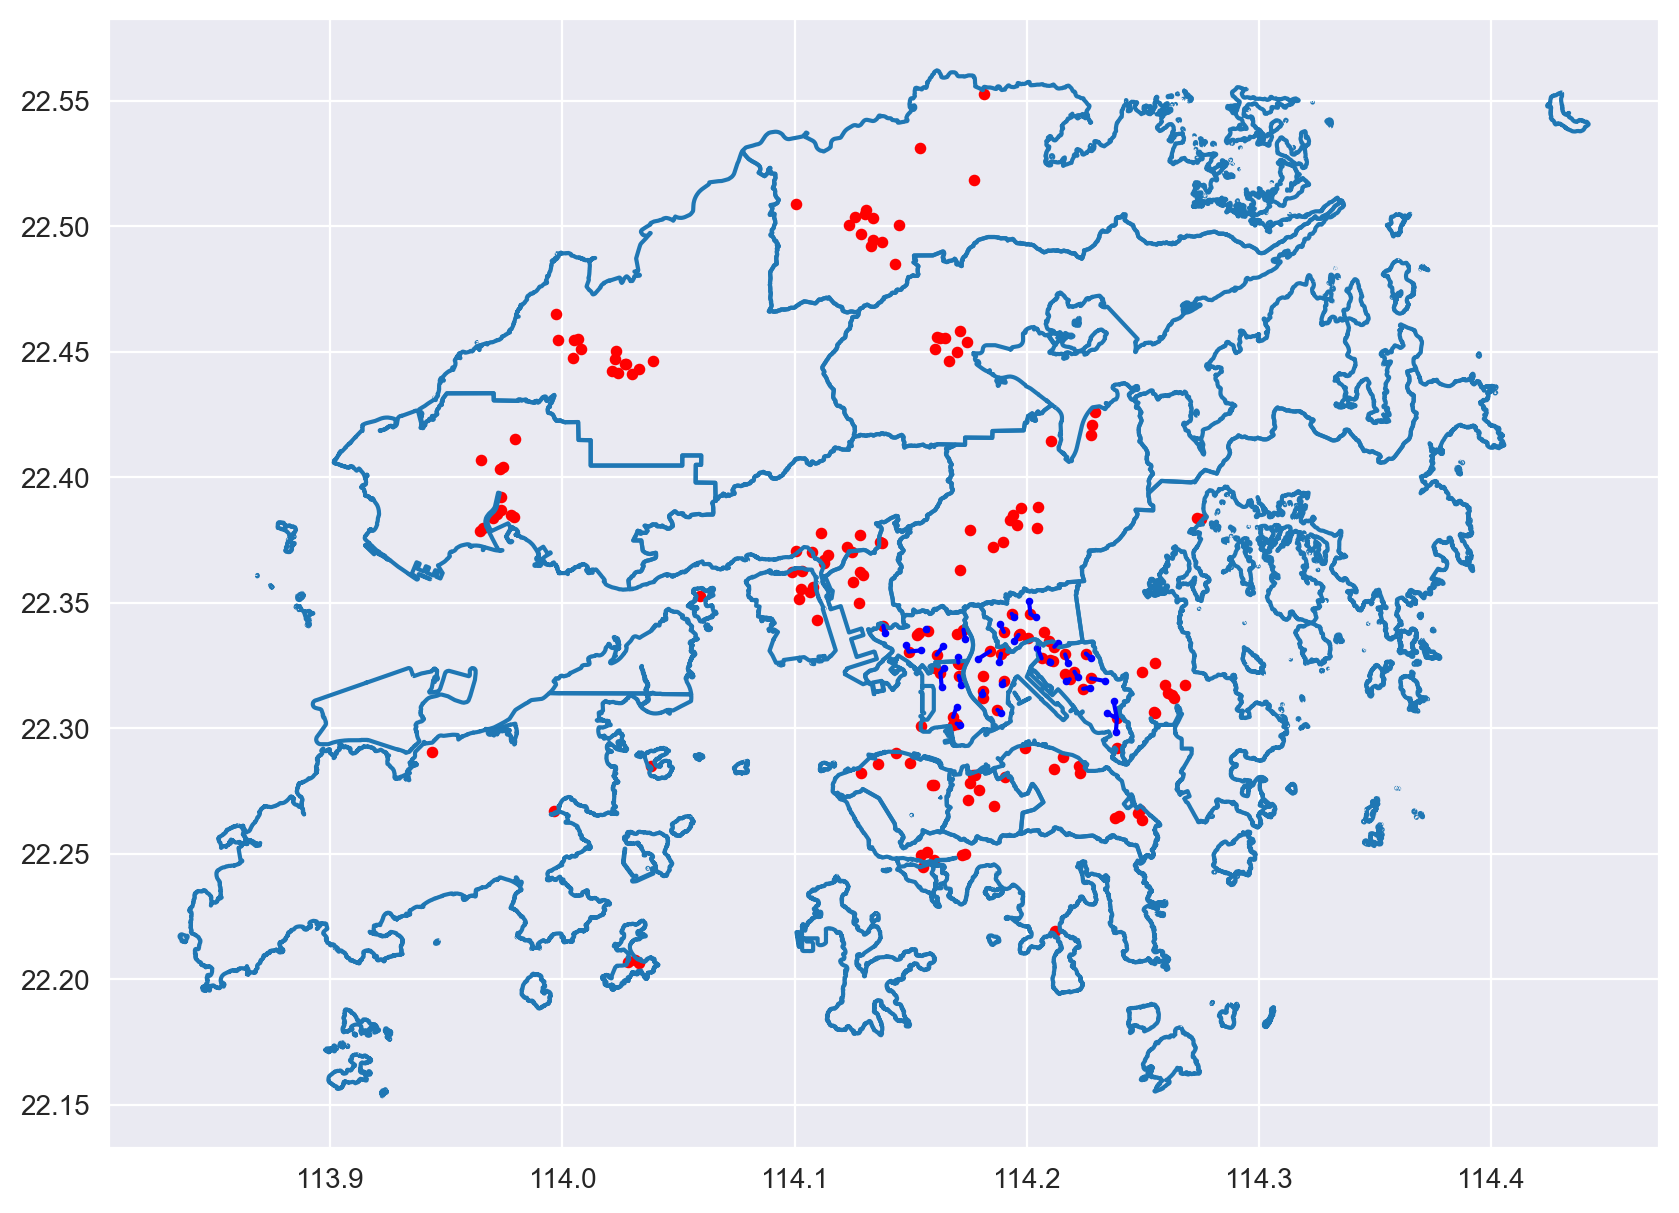

In [41]:
# plot the data points closest to centroids in Kowloon on the map with the centroids and draw a line between them
fig, ax = plt.subplots(figsize=(10,10))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], c='r', s=10)
plt.scatter(centroids_df_Kowloon['Longitude'], centroids_df_Kowloon['Latitude'], c='b', s=3)
for i in range(len(df_closest_Kowloon)):
    plt.plot([df_closest_Kowloon['Longitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]], [df_closest_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Latitude'].iloc[i]], 'b-')
plt.show()

In [42]:
# Interactive map of the data points closest to centroids in Kowloon on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=5,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_Kowloon)):
    folium.Marker(
        location=[centroids_df_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]],
        popup='Centroid ' + str(i+1),
        icon=folium.Icon(color='red')
    ).add_to(m)
for i in range(len(df_closest_Kowloon)):
    folium.PolyLine([[df_closest_Kowloon['Latitude'].iloc[i], df_closest_Kowloon['Longitude'].iloc[i]], [centroids_df_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m

In [43]:
# Interactive map of the data points closest to centroids in Kowloon on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=2,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_Kowloon)):
    folium.CircleMarker(
        location=[centroids_df_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]],
        radius=2,
        color = 'red',
        fill=True,
        fill_color='red',
    ).add_to(m)
for i in range(len(df_closest_Kowloon)):
    folium.PolyLine([[df_closest_Kowloon['Latitude'].iloc[i], df_closest_Kowloon['Longitude'].iloc[i]], [centroids_df_Kowloon['Latitude'].iloc[i], centroids_df_Kowloon['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m

In [44]:
# data points with distance over 750 meters
df_closest_Kowloon[df_closest_Kowloon['Distance (m)'] > 750]

Name   District            Type   Latitude  \
91  Lam Tin South Sports Centre  KWUN TONG  Sports Centres  22.303865   

    Longitude  BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
91  114.23884                 1                  1                  1   

    TABLE TENNIS TABLES  Distance (m)  
91                    1    785.030313

### New Territories

In [45]:
# find the data point with the shortest distance between each centroids in New Territories
closest_New_Territories, _ = pairwise_distances_argmin_min(centroids_df_New_Territories[['Latitude', 'Longitude']], X)
closest_New_Territories

array([ 48,  26, 116, 125,  66,  64,   7, 126,  29,  43,  99,  10, 143,
        14, 106,  47,  29, 160, 128, 154,  88,  32, 126, 140, 152,  62,
         3,  11, 119,  66,  29, 115, 151,  55,  87, 110,  63,  89,  65,
       150,  29,  86,  38,  98,   0, 168, 152, 117, 126,  58,  48, 153,
       148,  63,  99, 105, 124, 100], dtype=int64)

In [46]:
# display the data points with the closest centroids in New Territories
df_closest_New_Territories = df.iloc[closest_New_Territories]
df_closest_New_Territories.head()

Name    District  \
48                       Siu Lun Sports Centre    TUEN MUN   
26                Siu Lek Yuen Road Playground     SHA TIN   
116  Osman Ramju Sadick Memorial Sports Centre  KWAI TSING   
125                      Wo Hing Sports Centre       NORTH   
66        Ping Shan Tin Shui Wai Sports Centre   YUEN LONG   

                   Type   Latitude   Longitude  BADMINTON COURTS  \
48       Sports Centres  22.384254  113.979199                 1   
26   Recreation Grounds  22.388060  114.204800                 0   
116      Sports Centres  22.361123  114.129524                 1   
125      Sports Centres  22.484754  114.143135                 1   
66       Sports Centres  22.447393  114.004654                 1   

     BASKETBALL COURTS  VOLLEYBALL COURTS  TABLE TENNIS TABLES  
48                   1                  1                    1  
26                   0                  0                    0  
116                  1                  1                    1  
125                  1                  1                    1  
66                   1                  1                    1

In [47]:
# Convert the distance to meters
distances_New_Territories = []
for i in range(len(centroids_df_New_Territories)):
    distances_New_Territories.append(geodesic((centroids_df_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]), (df_closest_New_Territories['Latitude'].iloc[i], df_closest_New_Territories['Longitude'].iloc[i])).meters)
df_closest_New_Territories['Distance (m)'] = distances_New_Territories
df_closest_New_Territories.head()

C:\Users\visha\AppData\Local\Temp\ipykernel_17480\1197595603.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_closest_New_Territories['Distance (m)'] = distances_New_Territories


Name    District  \
48                       Siu Lun Sports Centre    TUEN MUN   
26                Siu Lek Yuen Road Playground     SHA TIN   
116  Osman Ramju Sadick Memorial Sports Centre  KWAI TSING   
125                      Wo Hing Sports Centre       NORTH   
66        Ping Shan Tin Shui Wai Sports Centre   YUEN LONG   

                   Type   Latitude   Longitude  BADMINTON COURTS  \
48       Sports Centres  22.384254  113.979199                 1   
26   Recreation Grounds  22.388060  114.204800                 0   
116      Sports Centres  22.361123  114.129524                 1   
125      Sports Centres  22.484754  114.143135                 1   
66       Sports Centres  22.447393  114.004654                 1   

     BASKETBALL COURTS  VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
48                   1                  1                    1   2900.474655  
26                   0                  0                    0    194.446691  
116                  1                  1                    1    128.896859  
125                  1                  1                    1    245.773453  
66                   1                  1                    1    369.239124

In [48]:
df_closest_New_Territories.describe()

Latitude   Longitude  BADMINTON COURTS  BASKETBALL COURTS  \
count  58.000000   58.000000         58.000000          58.000000   
mean   22.405289  114.121504          0.724138           0.672414   
std     0.053681    0.097500          0.450851           0.473432   
min    22.306300  113.964700          0.000000           0.000000   
25%    22.370915  114.034573          0.000000           0.000000   
50%    22.395613  114.128962          1.000000           1.000000   
75%    22.446140  114.202747          1.000000           1.000000   
max    22.508607  114.273300          1.000000           1.000000   

       VOLLEYBALL COURTS  TABLE TENNIS TABLES  Distance (m)  
count          58.000000            58.000000     58.000000  
mean            0.655172             0.620690   1060.966114  
std             0.479463             0.489453   1365.599604  
min             0.000000             0.000000     44.517629  
25%             0.000000             0.000000    239.255031  
50%             1.000000             1.000000    453.354546  
75%             1.000000             1.000000   1118.036940  
max             1.000000             1.000000   5933.516729

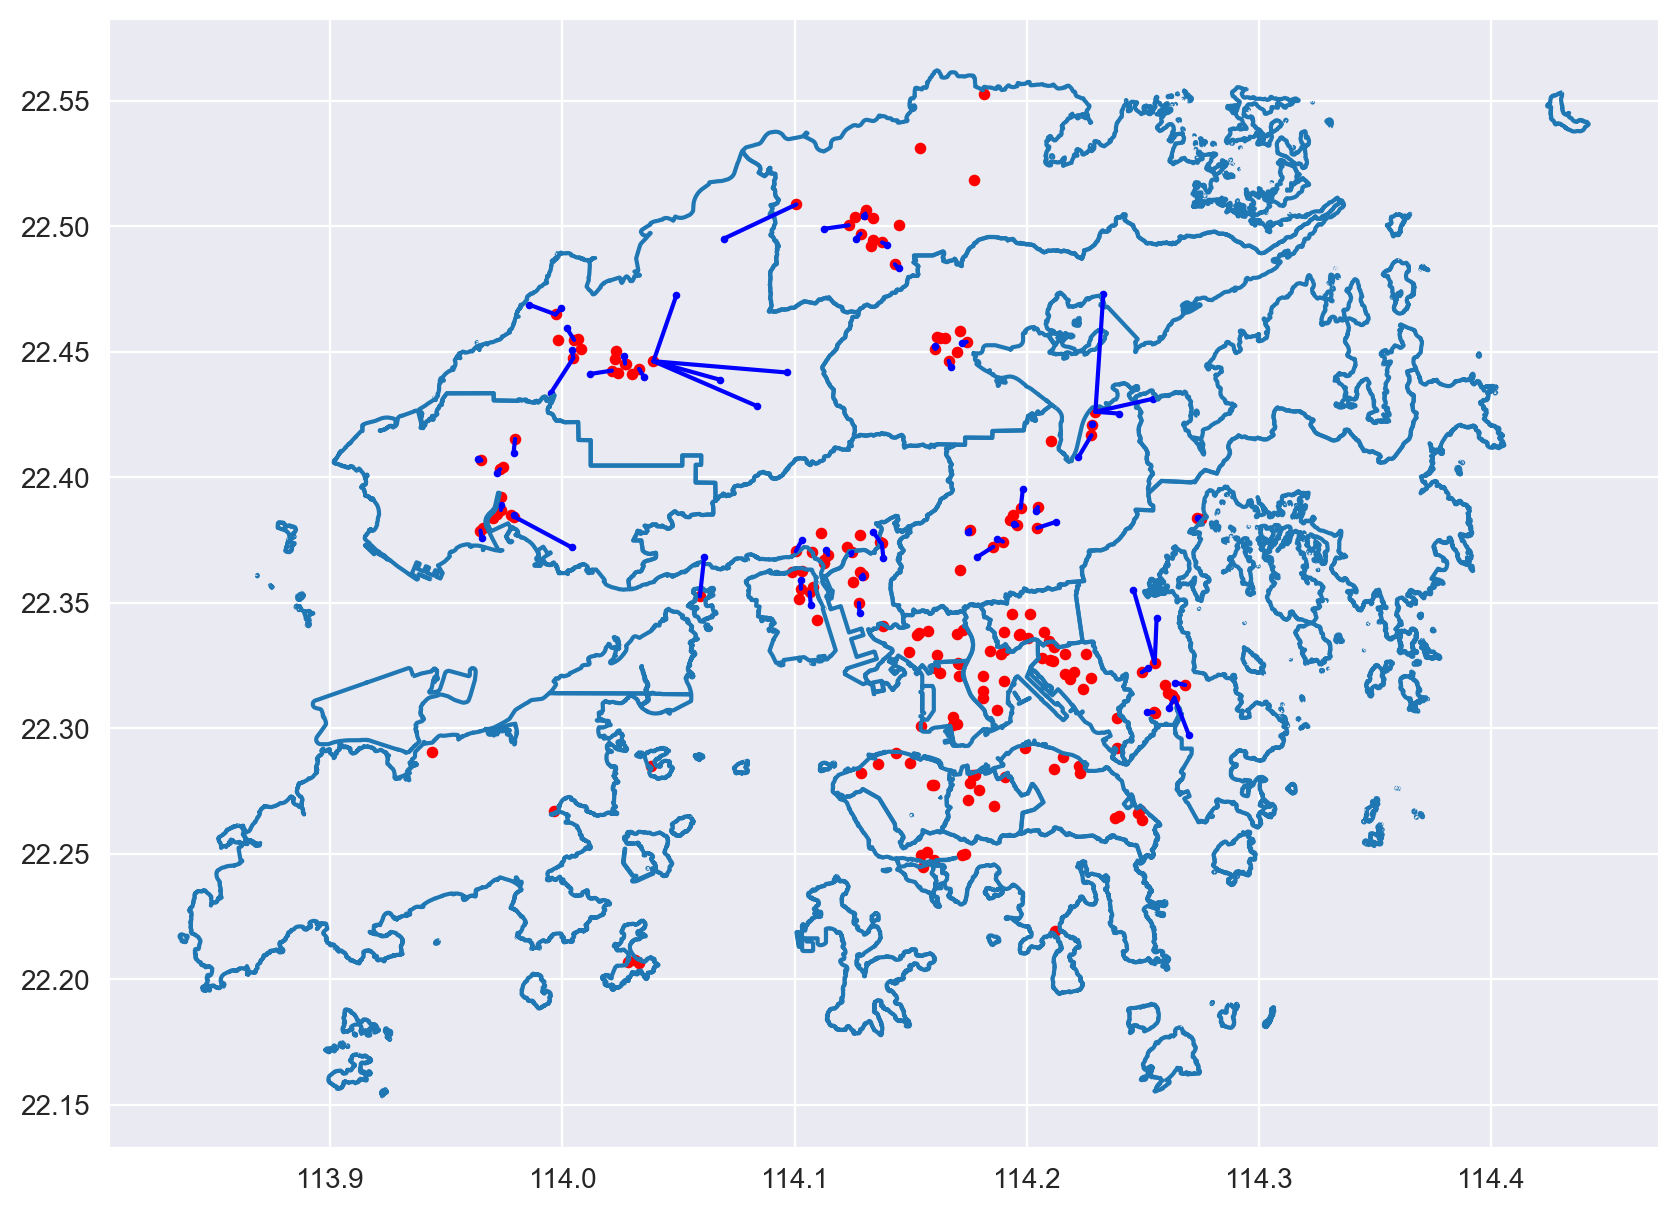

In [49]:
# plot the data points closest to centroids in New Territories on the map with the centroids and draw a line between them
fig, ax = plt.subplots(figsize=(10,10))
hong_kong.boundary.plot(ax=ax)
plt.scatter(df['Longitude'], df['Latitude'], c='r', s=10)
plt.scatter(centroids_df_New_Territories['Longitude'], centroids_df_New_Territories['Latitude'], c='b', s=3)
for i in range(len(df_closest_New_Territories)):
    plt.plot([df_closest_New_Territories['Longitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]], [df_closest_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Latitude'].iloc[i]], 'b-')
plt.show()

In [50]:
# data points with distance over 1000 meters
df_closest_New_Territories[df_closest_New_Territories['Distance (m)'] > 1000].sort_values(by='Distance (m)', ascending=False)

Name   District  \
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
126               Ma On Shan Sports Centre    SHA TIN   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
3          Tung Fong Children's Playground      NORTH   
99                    Po Lam Sports Centre   SAI KUNG   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
48                   Siu Lun Sports Centre   TUEN MUN   
126               Ma On Shan Sports Centre    SHA TIN   
99                    Po Lam Sports Centre   SAI KUNG   
66    Ping Shan Tin Shui Wai Sports Centre  YUEN LONG   
152            Tseung Kwan O Sports Ground   SAI KUNG   
10                     Pak Lam Road Garden  TSUEN WAN   
63              Tin Fai Road Sports Centre  YUEN LONG   
62                   Heng On Sports Centre    SHA TIN   
0            Tai Tau Leng Sitting-out Area      NORTH   
126               Ma On Shan Sports Centre    SHA TIN   

                                     Type   Latitude   Longitude  \
29   Other Recreation & Sports Facilities  22.446140  114.039200   
126                        Sports Centres  22.426024  114.229560   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
3                      Recreation Grounds  22.508607  114.100766   
99                         Sports Centres  22.325856  114.255108   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
48                         Sports Centres  22.384254  113.979199   
126                        Sports Centres  22.426024  114.229560   
99                         Sports Centres  22.325856  114.255108   
66                         Sports Centres  22.447393  114.004654   
152                        Sports Grounds  22.312130  114.263600   
10                     Recreation Grounds  22.352448  114.059196   
63                         Sports Centres  22.464796  113.997022   
62                         Sports Centres  22.416687  114.227866   
0                 Parks, Zoos and Gardens  22.500287  114.123291   
126                        Sports Centres  22.426024  114.229560   

     BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
29                  0                  0                  0   
126                 1                  1                  1   
29                  0                  0                  0   
3                   1                  0                  0   
99                  1                  1                  1   
29                  0                  0                  0   
29                  0                  0                  0   
48                  1                  1                  1   
126                 1                  1                  1   
99                  1                  1                  1   
66                  1                  1                  1   
152                 0                  0                  0   
10                  1                  1                  0   
63                  1                  1                  1   
62                  1                  1                  1   
0                   1                  0                  0   
126                 1                  1                  1   

     TABLE TENNIS TABLES  Distance (m)  
29                     0   5933.516729  
126                    1   5195.673073  
29                     0   4991.824508  
3                      0   3541.385685  
99                     1   3385.144371  
29                     0   3077.894300  
29                     0   3052.343738  
48                     1   2900.474655  
126                    1   2612.892704  
99                     1   2011.576041  
66                     1   1822.436021  
152                    0   1772.242806  
10                     0   1747.873644  
63                     1   1243.429874  
62                     1   1128.3712

In [51]:
# Interactive map of the data points closest to centroids in New Territories on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=2,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_New_Territories)):
    folium.Marker(
        location=[centroids_df_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]],
        popup='Centroid ' + str(i+1),
        icon=folium.Icon(color='red')
    ).add_to(m)
for i in range(len(df_closest_New_Territories)):
    folium.PolyLine([[df_closest_New_Territories['Latitude'].iloc[i], df_closest_New_Territories['Longitude'].iloc[i]], [centroids_df_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m


In [52]:
# Interactive map of the data points closest to centroids in New Territories on the map with the centroids and draw a line between them
m = folium.Map(location=[22.3524, 114.145], zoom_start=11)
for i in range(0, len(df)):
    folium.CircleMarker(
        location=[df.iloc[i]['Latitude'], df.iloc[i]['Longitude']],
        radius=2,
        color = 'green',
        fill=True,
        fill_color='blue',
        popup=df.iloc[i]['Name']
    ).add_to(m)
for i in range(len(centroids_df_New_Territories)):
    folium.CircleMarker(
        location=[centroids_df_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]],
        popup='Centroid ' + str(i+1),
        radius=2,
        color = 'red',
    ).add_to(m)
for i in range(len(df_closest_New_Territories)):
    folium.PolyLine([[df_closest_New_Territories['Latitude'].iloc[i], df_closest_New_Territories['Longitude'].iloc[i]], [centroids_df_New_Territories['Latitude'].iloc[i], centroids_df_New_Territories['Longitude'].iloc[i]]], color="blue", weight=2.5, opacity=1).add_to(m)
m


In [53]:
# data points with distance over 1000 meters
df_closest_New_Territories[df_closest_New_Territories['Distance (m)'] > 2000]

Name   District  \
48                   Siu Lun Sports Centre   TUEN MUN   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
99                    Po Lam Sports Centre   SAI KUNG   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
126               Ma On Shan Sports Centre    SHA TIN   
3          Tung Fong Children's Playground      NORTH   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
29   Yuen Long Town Cycling Entry/Exit Hub  YUEN LONG   
126               Ma On Shan Sports Centre    SHA TIN   
99                    Po Lam Sports Centre   SAI KUNG   

                                     Type   Latitude   Longitude  \
48                         Sports Centres  22.384254  113.979199   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
99                         Sports Centres  22.325856  114.255108   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
126                        Sports Centres  22.426024  114.229560   
3                      Recreation Grounds  22.508607  114.100766   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
29   Other Recreation & Sports Facilities  22.446140  114.039200   
126                        Sports Centres  22.426024  114.229560   
99                         Sports Centres  22.325856  114.255108   

     BADMINTON COURTS  BASKETBALL COURTS  VOLLEYBALL COURTS  \
48                  1                  1                  1   
29                  0                  0                  0   
99                  1                  1                  1   
29                  0                  0                  0   
126                 1                  1                  1   
3                   1                  0                  0   
29                  0                  0                  0   
29                  0                  0                  0   
126                 1                  1                  1   
99                  1                  1                  1   

     TABLE TENNIS TABLES  Distance (m)  
48                     1   2900.474655  
29                     0   5933.516729  
99                     1   2011.576041  
29                     0   3077.894300  
126                    1   5195.673073  
3                      0   3541.385685  
29                     0   3052.343738  
29                     0   4991.824508  
126                    1   2612.892704  
99                     1   3385.144371